In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [12]:

df = pd.read_csv('./audio_features_final.csv', index_col=0)
df['resonance'] = df['f1_diff'] + df['f2_diff']

df = df[['pitch', 'intonation', 'resonance', 'gender']]

male_df = df[df.gender == 'male']
female_df = df[df.gender == 'female']

/opt/anaconda3/lib/python3.9/site-packages/pandas/plotting/_matplotlib/boxplot.py:394: UserWarning: When passing multiple axes, sharex and sharey are ignored. These settings must be specified when creating axes
  ax = boxplot(


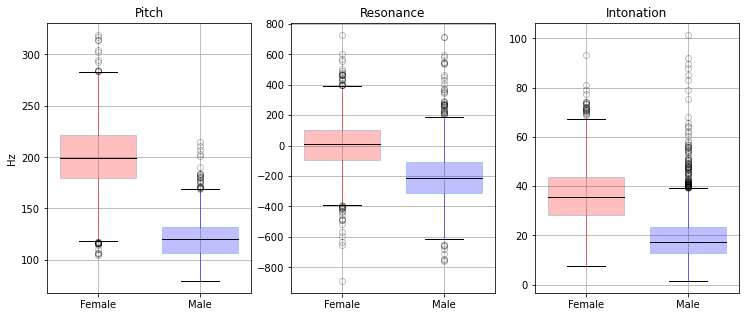

In [94]:
# create boxplot
fig, axes = plt.subplots(ncols=3, figsize=(12, 5))
boxplot = df.boxplot(
    by='gender',
    column=['pitch', 'resonance', 'intonation'],
    return_type='both',
    ax=axes,
    patch_artist=True,
    # showfliers=False,
    widths=0.75
)

# customize plot style
colors = ['r', 'b']
for row_key, (ax, row) in boxplot.iteritems():
    ax.set_xlabel('')
    ax.set_title(row_key.capitalize())
    ax.set_xticklabels(['Female', 'Male'])
    for i, box in enumerate(row['boxes']):
        box.set(facecolor=colors[i], alpha=0.25)
        # box.set(hatch='/')
    for i, whisker in enumerate(row['whiskers']):
        whisker.set(color=colors[i >> 1], alpha=0.5)
    for i, cap in enumerate(row['medians']):
        cap.set(color='black')
    for i, cap in enumerate(row['fliers']):
        cap.set(color='black', alpha=0.25)


axes[0].set_ylabel('Hz')
fig.suptitle('')

plt.show()

In [38]:
feature_mean = df[['pitch', 'intonation', 'resonance', 'gender']].groupby('gender').mean()
feature_std = df[['pitch', 'intonation', 'resonance', 'gender']].groupby('gender').std()
feature_mean

,pitch,intonation,resonance
gender,,,
female,200.711768,36.316982,0.364643
male,120.411317,19.414972,-206.158257


<BarContainer object of 2 artists>

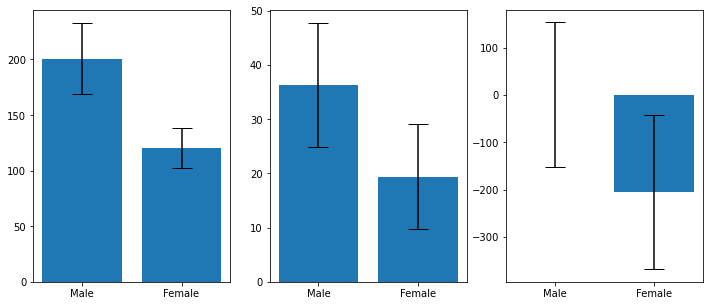

In [43]:
fig, axes = plt.subplots(ncols=3, figsize=(12, 5), sharey=False)

axes[0].bar(['Male', 'Female'], feature_mean['pitch'], yerr=feature_std['pitch'], capsize=10)
axes[1].bar(['Male', 'Female'], feature_mean['intonation'], yerr=feature_std['intonation'], capsize=10)
axes[2].bar(['Male', 'Female'], feature_mean['resonance'], yerr=feature_std['resonance'], capsize=10)
# plt.bar(['Pitch', 'Intonation', 'Resonance'], feature_mean.iloc[0])

In [35]:
feature_mean.iloc[0]

pitch         200.711768
intonation     36.316982
resonance       0.364643
Name: female, dtype: float64